In [1]:
import csv

import pandas as pd

import numpy as np

import torch

from torch import nn, optim

from torch.autograd import Variable

from torch.utils.data import Dataset

from torch.utils.data import DataLoader

In [12]:
# 定义自己的类
class MyDataset(Dataset):
    
    # 初始化
    def __init__(self, file_name):
        # 读入数据
        self.data = pd.read_csv(file_name)
    
    # 返回df的长度
    def __len__(self):
        return len(self.data)
    
    # 获取第idx+1列的数据
    def __getitem__(self, idx):
        return self.data.values[idx,1:10]

# 通过实例化对象来访问该类
# 假设同目录下存在名为median_benchmark.csv的文件
ds = MyDataset('formatweather.csv')
ds=np.asarray(ds[:], dtype = np.float32)#####源文件float32 ,不知道为什么读取变为float64，这里再进行处理  最大最小化时变化
##dl = DataLoader(ds, batch_size=100, shuffle=False)

#####处理为torch，分为trainx，trainy
torchds=torch.from_numpy(ds[:])

dl = DataLoader(torchds, batch_size=100, shuffle=False)

In [13]:
for i, data in enumerate(dl, 1):
        
            train_x=data[:,0:8]
            
            break

In [14]:
type(train_x)

torch.Tensor

In [15]:
class Cnn(nn.Module):

    def __init__(self, in_dim, n_class):

        super(Cnn, self).__init__()

        self.conv = nn.Sequential(

            nn.Conv2d(in_dim, 6, (1,2), stride=(1), padding=(0,1)),#6,1,9

            nn.ReLU(True),

            nn.MaxPool2d(1, 1),#6,1,9

            nn.Conv2d(6, 16, (1,3), stride=(1), padding=(0,1)),

            nn.ReLU(True), nn.MaxPool2d(1, 1))#16,1,9
   
            #5*144

        self.fc = nn.Sequential(

            nn.Linear(144, 16), nn.Linear(16, 8), nn.Linear(8, n_class))



    def forward(self, x):

        out = self.conv(x)

        out = out.view(out.size(0), -1)

        out = self.fc(out)
        
        #out = out.view(5)

        return out

In [16]:
model = Cnn(1, 1)
##model.load_state_dict(torch.load('./weathercnn.pth'))
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [17]:
losslist=[]
for epoch in range(100):
 
    print('epoch {}'.format(epoch + 1))

    print('*' * 10)

    running_loss = 0.0

    for i, data in enumerate(dl, 1):
        
            train_x=data[:,0:8]
            
            train_x=train_x.view(-1,1,1,8)
            
            train_y=data[:,8]
            
            train_y=train_y.view(-1,1)
            
            train_x=Variable(train_x)
            
            train_y=Variable(train_y)
        
            out = model(train_x)

            loss = criterion(out, train_y)
            

            # 向后传播

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()
            
    losslist.append(loss)   
           
                
    print('loss:-------')
    print(loss)            
    #print(out,train_y)

epoch 1
**********
loss:-------
tensor(0.0073, grad_fn=<MseLossBackward>)
epoch 2
**********
loss:-------
tensor(0.0069, grad_fn=<MseLossBackward>)
epoch 3
**********
loss:-------
tensor(0.0065, grad_fn=<MseLossBackward>)
epoch 4
**********
loss:-------
tensor(0.0061, grad_fn=<MseLossBackward>)
epoch 5
**********
loss:-------
tensor(0.0058, grad_fn=<MseLossBackward>)
epoch 6
**********
loss:-------
tensor(0.0055, grad_fn=<MseLossBackward>)
epoch 7
**********
loss:-------
tensor(0.0052, grad_fn=<MseLossBackward>)
epoch 8
**********
loss:-------
tensor(0.0049, grad_fn=<MseLossBackward>)
epoch 9
**********
loss:-------
tensor(0.0046, grad_fn=<MseLossBackward>)
epoch 10
**********
loss:-------
tensor(0.0043, grad_fn=<MseLossBackward>)
epoch 11
**********
loss:-------
tensor(0.0040, grad_fn=<MseLossBackward>)
epoch 12
**********
loss:-------
tensor(0.0038, grad_fn=<MseLossBackward>)
epoch 13
**********
loss:-------
tensor(0.0035, grad_fn=<MseLossBackward>)
epoch 14
**********
loss:-------
t

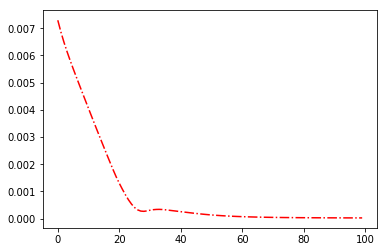

In [24]:
import matplotlib.pyplot as plt
plt.plot(losslist,'r-.') 
plt.show()

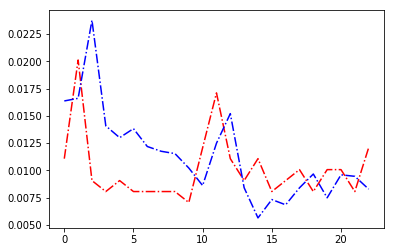

In [40]:
x=range(0,23)
plt.plot(x,train_y.numpy(),'r-.',label='train_y') 
plt.plot(x,out.detach().numpy(),'b-.',label='out') 
plt.show()

In [104]:
# 保存模型
torch.save(model.state_dict(), './originalweathercnn.pth')

In [12]:
out[120:150]

tensor([[0.1062],
        [0.1069],
        [0.1067],
        [0.1068],
        [0.1067],
        [0.1066],
        [0.1066],
        [0.1067],
        [0.1064],
        [0.1060],
        [0.1058],
        [0.1055],
        [0.1053],
        [0.1042],
        [0.1040],
        [0.1016],
        [0.1038],
        [0.1040],
        [0.1043],
        [0.1030],
        [0.1049],
        [0.1057],
        [0.1059],
        [0.1061],
        [0.1060],
        [0.1038],
        [0.1038],
        [0.1052],
        [0.1056],
        [0.1054]], grad_fn=<SliceBackward>)

In [13]:
train_y[10:15]

tensor([[0.0992],
        [0.0992],
        [0.0992],
        [0.0992],
        [0.0992]])

In [ ]:
x=np.array([[0.129779 ,0.352941 ,0.245902 ,0.527273 ,0.666667 ,0.002290 ,0.000000 ,0.0],  
        [0.148893 ,0.367647 ,0.245902 ,0.527273 ,0.666667 ,0.003811 ,0.000000 ,0.0],
        [0.159960 ,0.426471 ,0.229508 ,0.545454 ,0.666667 ,0.005332 ,0.000000 ,0.0],
        [0.182093 ,0.485294 ,0.229508 ,0.563637 ,0.666667 ,0.008391 ,0.037037 ,0.0],
        [0.138833 ,0.485294 ,0.229508 ,0.563637 ,0.666667 ,0.009912 ,0.074074 ,0.0]],dtype = np.float32)
y=np.array([0.1 ,0.1 ,0.1 ,0.1 ,0.1])